I'll call the new padding method "edge padding".

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imageConv(img, mask, edge_padding = False):
    h,w = img.shape
    n = mask.shape[0]
    k = int((n-1)/2)
    p_h = h+2*k
    p_w = w+2*k
    output = np.zeros((h,w))
    img_padding = np.zeros((p_h,p_w))
    img_padding[k:h+k,k:w+k] = img
    
    if edge_padding:
        for i in range(k):
            img_padding[i,k:p_w-k] = img[0]
            img_padding[p_h-k+i,k:p_w-k] = img[h-1]
            img_padding[k:p_h-k,i] = img[:,0]
            img_padding[k:p_h-k,p_w-k+i] = img[:,w-1]
        img_padding[:k,:k] = img[0,0]
        img_padding[:k,p_w-k:p_w] = img[0,w-1]
        img_padding[p_h-k:p_h,:k] = img[h-1,0]
        img_padding[p_h-k:p_h,p_w-k:p_w] = img[h-1,w-1]
        
    for x in range (k,h+k):
        for y in range(k,w+k):
            sub_img = img_padding[x-k:x+k+1,y-k:y+k+1]
            for u in range(n):
                for v in range(n):
                    output[x-k,y-k] += sub_img[u,v]*mask[u,v]
    return output

In [3]:
img = cv2.imread("Lenna.png", cv2.IMREAD_GRAYSCALE)

In [4]:
n = 11
mask = mask = np.ones((n,n))/(n*n)
output_zero = imageConv(img, mask)
output_edge = imageConv(img, mask, True)

Text(0.5, 1.0, 'edge padding')

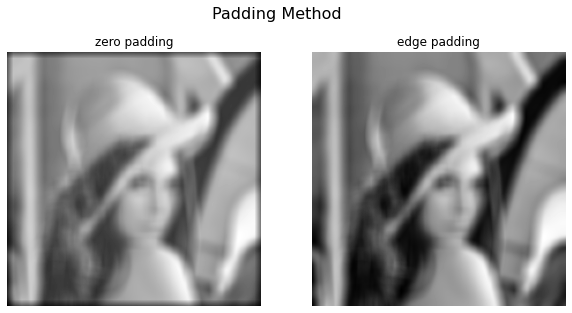

In [5]:
plt.figure(figsize=(10,5))
plt.suptitle("Padding Method",fontsize=16)
plt.subplot(1,2,1); plt.imshow(output_zero, cmap = "gray"); plt.axis("off")
plt.title("zero padding")
plt.subplot(1,2,2); plt.imshow(output_edge, cmap = "gray"); plt.axis("off")
plt.title("edge padding")